In [1]:
import pandas as pd
import plotly.express as px
import statsmodels.api as sm

In [2]:
df = pd.read_parquet("smart_meter.parquet")

In [3]:
df.columns

Index(['measurement', '0100011D00FF', '0100021D00FF', 'timestamp',
       'tags_muid'],
      dtype='object')

In [4]:
df.head()

,measurement,0100011D00FF,0100021D00FF,timestamp,tags_muid
0,energy,0.0415,None,2021-12-16 00:00:00,C-2caa1954-b3c8-466c-9722-c1b72dabe32b
1,energy,0.0228,None,2021-12-15 23:45:00,C-2caa1954-b3c8-466c-9722-c1b72dabe32b
2,energy,0.0101,None,2021-12-15 23:30:00,C-2caa1954-b3c8-466c-9722-c1b72dabe32b
3,energy,0.0369,None,2021-12-15 23:15:00,C-2caa1954-b3c8-466c-9722-c1b72dabe32b
4,energy,0.0102,None,2021-12-15 23:00:00,C-2caa1954-b3c8-466c-9722-c1b72dabe32b


In [5]:
df.timestamp.dtype

dtype('<M8[ns]')

In [6]:
fig = px.histogram(df, x="0100011D00FF", color="tags_muid", hover_data=df.columns)
fig.show()

In [7]:
fig = px.line(df, x="timestamp", y="0100011D00FF", color="tags_muid", hover_data=df.columns)
fig.show()

In [8]:
df_day = df.groupby([df["timestamp"].dt.date]).mean().reset_index()

In [9]:
fig = px.line(df_day, x="timestamp", y="0100011D00FF")
fig.show()

In [10]:
df_hour = df.groupby([df["timestamp"].dt.hour]).mean().reset_index()

In [11]:
fig = px.line(df_hour, x="timestamp", y="0100011D00FF")
fig.show()

In [12]:
num_days = len(df_day)

In [51]:
analysis = df_day[["0100011D00FF", "timestamp"]].copy(deep=True).set_index("timestamp")
analysis.sort_index(inplace=True)

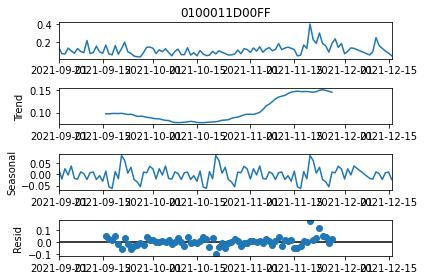

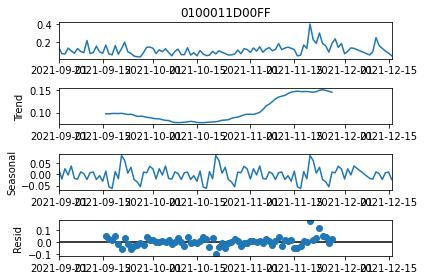

In [59]:
decompose_result_mult = sm.tsa.seasonal_decompose(analysis["0100011D00FF"], period=30)

trend = decompose_result_mult.trend
seasonal = decompose_result_mult.seasonal
residual = decompose_result_mult.resid

decompose_result_mult.plot()

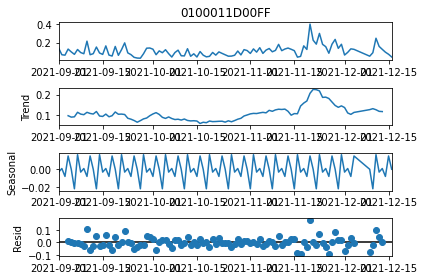

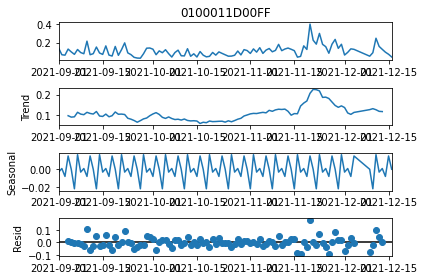

In [60]:
decompose_result_mult = sm.tsa.seasonal_decompose(analysis["0100011D00FF"], period=7)

trend = decompose_result_mult.trend
seasonal = decompose_result_mult.seasonal
residual = decompose_result_mult.resid

decompose_result_mult.plot()

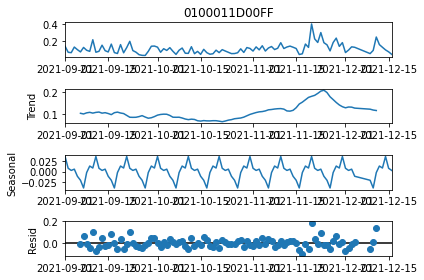

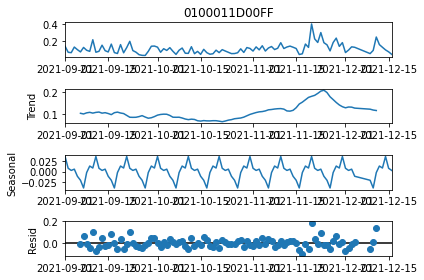

In [77]:
decompose_result_mult = sm.tsa.seasonal_decompose(analysis["0100011D00FF"], period=10)

trend = decompose_result_mult.trend
seasonal = decompose_result_mult.seasonal
residual = decompose_result_mult.resid

decompose_result_mult.plot()

In [78]:
# TODO: Plot data nicely